# SUPPORT VECTOR MACHINES

- Capable of performing linear or nonlinear classification, regression, and even outlier detection.
- SVMs are particularly well suited for classification of omplex but small- or medium-sized datasets.

### Linear SVM Classification
- We can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) between the classes. This is called <b>large margin classification</b>.<br/>

Normal Decision Boundary vs SVM Decision Boundary
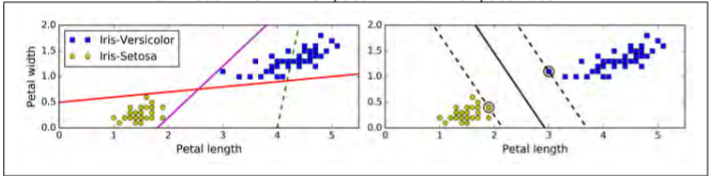

- The decision boundary of an SVM classifier; this line not only separates the two classes but also stays as far away from the closest training instances as possible.
- Notice that adding more training instances “off the street” will not affect the decision boundary at all: it is fully determined (or “supported”) by the instances located on the edge of the street. These instances are called the support vectors (circled).
- SVMs are <b>sensitive to the feature scales</b>, we have to use StandardScaler befor training.

### Soft Margin Classification
- If we strictly impose that all instances be off the street and on the right side, this is called hard margin classification.
- Issues with hard margin classification
    1. Only works if the data is linearly separable.
    2. Quite sensitive to outliers.
    
<b>Objectives</b> - Find a good balance between keeping the street as large as possible and limiting the margin violations (i.e., instances that end up in the middle of the street or even on the wrong side).

- In Scikit-Learn’s SVM classes, you can control this balance using the C hyperparameter: a <b>smaller C</b> value leads to a <b>wider street</b> but <b>more margin violations</b>.

- If your SVM model is overfitting, you can try regularizing it by <b>reducing C</b>.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica
svm_clf = Pipeline((
 ("scaler", StandardScaler()),
 ("linear_svc", LinearSVC(C=1, loss="hinge")),
 ))
# Hinge loss function will be described shortly.
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [2]:
svm_clf.predict([[5.5, 1.7]])
# Unlike Logistic Regression classifiers, SVM classifiers do not output probabilities for each class

array([1.])

- Alternatively, we could use the SVC class instead of LinearSVC, using SVC(kernel="linear", C=1), but it is much slower, especially with large training sets, so it is not recommended.
- We can use the SGDClassifier class, with SGDClassifier(loss="hinge",alpha=1/(m*C)). This applies <b>regular Stochastic Gradient Descent to train a linear SVM classifier</b>. This is useful for huge datasets.
- The LinearSVC class regularizes the bias term, so you should center the training set first by subtracting its mean. This is automatic if you scale the data using the StandardScaler.
- We should set the loss hyperparameter to "hinge", as it is not the default value.
- For better performance you should set the dual hyperparameter to False, unless there are more features than training instances (we will discuss duality later in the chapter).

### Nonlinear SVM Classification
- Approach to handling nonlinear datasets (not linearly separable) is to add more features, such as polynomial features.

Above mention concept is explained below

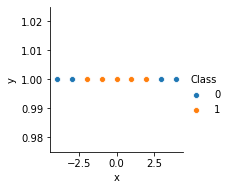

In [3]:
# Custom dataset
X = [-4,-3,-2,-1,0,1,2,3,4]
y = [0,0,1,1,1,1,1,0,0]
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'x':X,'y':[1 for i in range(9)],'Class':y})
sns.pairplot(x_vars='x', y_vars='y', data=df, hue='Class')
# As we can see there is no way we can introduce a decision boundary.

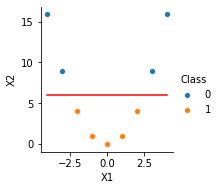

In [4]:
# But if we introduce polynomial feature.
# we can introduce a decision boundry easily.
df = pd.DataFrame({'x':X,'y':[i**2 for i in X],'Class':y})
sns.pairplot(x_vars='x', y_vars='y', data=df, hue='Class').set(xlabel='X1', ylabel='X2')
import matplotlib.pyplot as plt
plt.plot([-4,4],[6,6], color = 'r')

In [5]:
# Implementation with sk-learn
from sklearn.datasets import make_moons
# A simple toy dataset to visualize clustering and classification algorithms.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
X, y = make_moons()
# we have to add features with polynomial degree 3.
polynomial_svm_clf = Pipeline((
 ("poly_features", PolynomialFeatures(degree=3)),
 ("scaler", StandardScaler()),
 ("svm_clf", LinearSVC(C=10, loss="hinge"))
 ))
polynomial_svm_clf.fit(X, y)

c:\users\vivek\.conda\envs\machine_learning\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

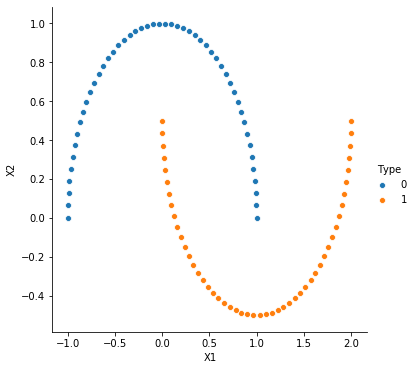

In [6]:
y_pred = polynomial_svm_clf.predict(X)
df = pd.DataFrame({'x':X[:,:1].ravel(),'y':X[:,1:].ravel(),'Type':y_pred})
plot = sns.pairplot(x_vars='x', y_vars='y', data=df, hue='Type', height = 5)
plot.set(xlabel='X1', ylabel='X2')
# Plot showing non-linear prediction

### Polynomial Kernel
- With a high polynomial degree PolynomialFeatures creates a huge number of features, making the model too slow.
- <b>Kernel Trick</b> - It makes it possible to get the same result as if you added many polynomial features, even with very highdegree polynomials, without actually having to add them.

In [7]:
# Get make circles dataset
# We will use SVC in place of LinearSVC to get kernel trick
from sklearn.svm import SVC
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 500, noise = 0.2)
poly_kernel_svm_clf = Pipeline((
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
 ))
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

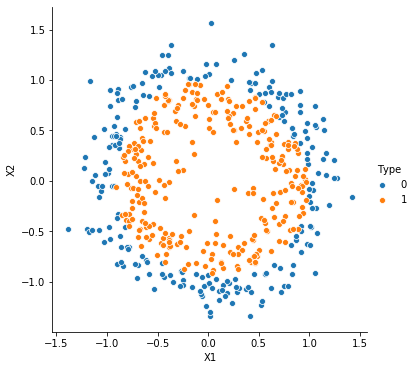

In [8]:
y_pred = poly_kernel_svm_clf.predict(X)
df = pd.DataFrame({'x':X[:,:1].ravel(),'y':X[:,1:].ravel(),'Type':y_pred})
plot = sns.pairplot(x_vars='x', y_vars='y', data=df, hue='Type', height = 5)
plot.set(xlabel='X1', ylabel='X2')
# Plot showing non-linear prediction

- <b>degree</b> - reduce when oerfitting, increase when underfitting.
- <b>coef0</b> - controls how much the model is influenced by highdegree polynomials versus low-degree polynomials.
----------------------------------------------------------------------------------------------------------------------
- A common approach to find the right hyperparameter values is to use grid search.
-  It is often faster to first do a very coarse grid search, then a finer grid search around the best values found.

### Adding Similarity Features
Another technique to tackle nonlinear problems is to add features computed using a <b>similarity function</b> that measures how much each instance resembles a particular <b>landmark</b>. Ex- 
- Let’s take the one-dimensional dataset discussed earlier X = [-4,-3,-2,-1,0,1,2,3,4]
- Add two landmarks to it at x2 = –2 and x3 = 1
- let’s define the similarity function to be the <b>Gaussian Radial Basis Function</b> (RBF) with γ = 0.3<br/>
$
{\displaystyle \phi_{\gamma}(\mathbf{x}, \boldsymbol{\ell})} = {\displaystyle \exp({\displaystyle -\gamma \left\| \mathbf{x} - \boldsymbol{\ell} \right\|^2})}
$<br/>
- It is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark).<br/>

<u>x1 = -1</u><br/>
x2 = exp (–0.3 × 12) ≈ 0.74<br/>
x3 = exp (–0.3 × 22) ≈ 0.30.<br/>
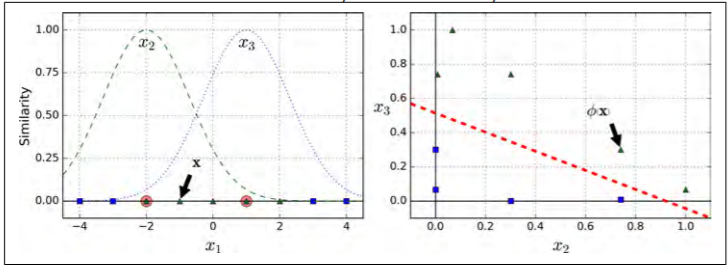
- Plot above shows the transformed dataset (dropping the original features). As you can see, it is now linearly separable.

How to select a landmark?
- The simplest approach is to create a landmark at the location of each and every instance in the dataset.
- This creates many dimensions and thus increases the chances that the transformed training set will be linearly separable.
- <u>Cons</u> - A training set with m instances and n features gets transformed into a training set with m instances and m features (assuming you drop the original features). If your training set is very large, you end up with an equally large number of features.

### Gaussian RBF Kernel (Similarity features)
- Kernel trick makes it possible to obtain a similar result as if you had added many similarity features, without actually having to add them.

In [9]:
rbf_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
 ))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

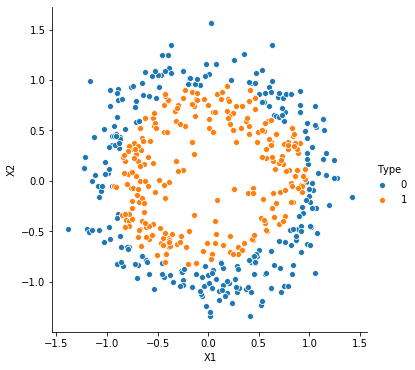

In [10]:
y_pred = rbf_kernel_svm_clf.predict(X)
df = pd.DataFrame({'x':X[:,:1].ravel(),'y':X[:,1:].ravel(),'Type':y_pred})
plot = sns.pairplot(x_vars='x', y_vars='y', data=df, hue='Type', height = 5)
plot.set(xlabel='X1', ylabel='X2')

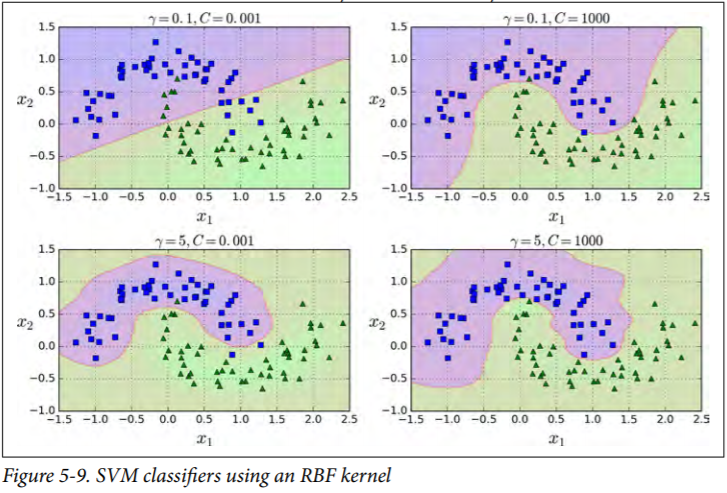
- Increasing gamma makes the bell-shape curve narrower, and as a result each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. 
- Conversely, a small gamma value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother. 
- Similar to the C hyperparameter as we studied before, $\gamma$ acts like a regularization hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting, you should increase it.

#### <u>Kernels</u>
There are many kernels available to use with SVM, eg: String kernels are sometimes used when classifying text documents or DNA sequences.<br/>
How to choose?
- you should always try the linear kernel first (remember that LinearSVC is much faster than SVC(kernel="linear")), specially when the training set is large and it has plenty of features.
- If the training set is not too large, you should try the Gaussian RBF kernel as well; it works well in most cases.
- If we have time, we can experiment with a few other kernels using cross-validation and grid search, especially if there are kernels specialized for your training set’s data structure.

### Computational Complexity
- The LinearSVC class is based on the <u>liblinear library</u>, which implements an optimized algorithm for linear SVMs. It <b>does not support the kernel trick</b>, but it scales almost linearly with the number of training instances and the number of features: its training time complexity is roughly O(m × n).
- The algorithm takes longer if you require a very high precision. This is controlled by the tolerance hyperparameter ϵ (called tol in Scikit-Learn).
-------------------------------------------------------------------------------------------
- The SVC class is based on the libsvm library, which implements an algorithm that supports the kernel trick, The training time complexity is usually between O($m^2$ × n) and O($m^3$ × n).
- This algorithm is perfect for complex but small or medium training sets. However, it scales well with the number of features, especially with <b>sparse features</b> (i.e., when each instance has few nonzero features). In this case, the algorithm scales roughly with the average number of nonzero features per instance.
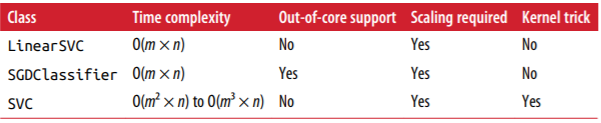

### SVM Regression
- SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street).
- The width of the street is controlled by a hyperparameter ϵ.
- ϵ is proportional to margin width.
- Adding more training instances within the margin does not affect the model’s predictions; thus, the model is said to be <b>ϵ-insensitive</b>.

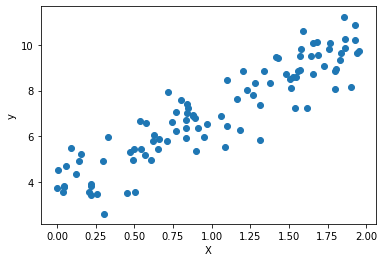

In [11]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1) # 100 rows, 1 column
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

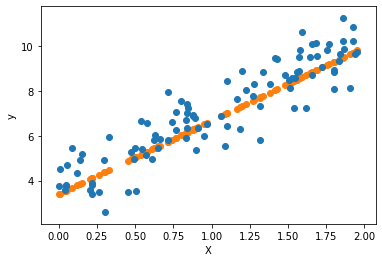

In [12]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y.ravel())
y_pred = svm_reg.predict(X)
plt.scatter(X, y_pred, c= '#ff7f0e')
# Predicted data is orange
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

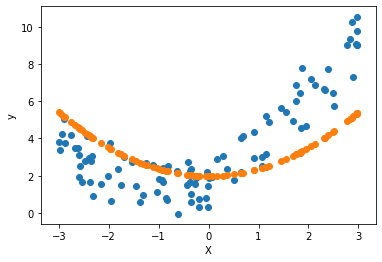

In [13]:
# To tackle nonlinear regression tasks, you can use a kernelized SVM model.
# The SVR class is the regression equivalent of the SVC class, and the LinearSVR class is the regression equivalent of the LinearSVC class.
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
# Less regularization(high c), chance of overfitting
svm_poly_reg.fit(X, y.ravel())
y_pred = svm_poly_reg.predict(X)
plt.scatter(X, y_pred, c= '#ff7f0e')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

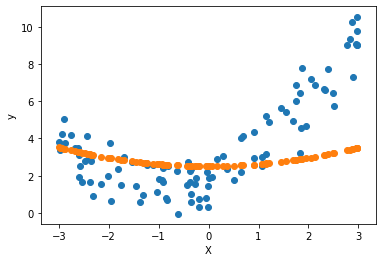

In [14]:
plt.scatter(X, y)
svm_poly_reg = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
# more regularization(low c), chance of underfitting
svm_poly_reg.fit(X, y.ravel())
y_pred = svm_poly_reg.predict(X)
plt.scatter(X, y_pred, c= '#ff7f0e')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

- SVMs can also be used for <b>outliers detection - SVM.OneClassSVM</b>

In [15]:
# The section ahead mentioned that how SVM works and is trained.
# Skipping it for future studies.